### Clustering con K-means

## Importar las librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [2]:
X,y,c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True)

In [3]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)

In [4]:
df_blobs

,x1,x2,y
0,-0.695208,6.858426,0
1,-2.569322,-3.996911,1
2,-9.608812,5.138531,2
3,-9.169099,5.632884,2
4,-11.427599,5.490738,2
...,...,...,...
495,-7.726370,5.253098,2
496,-9.187636,4.157398,2
497,-1.298481,-3.295442,1
498,-2.564895,-5.074162,1


In [5]:
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1]
    }
)

## Visualizacion de datos

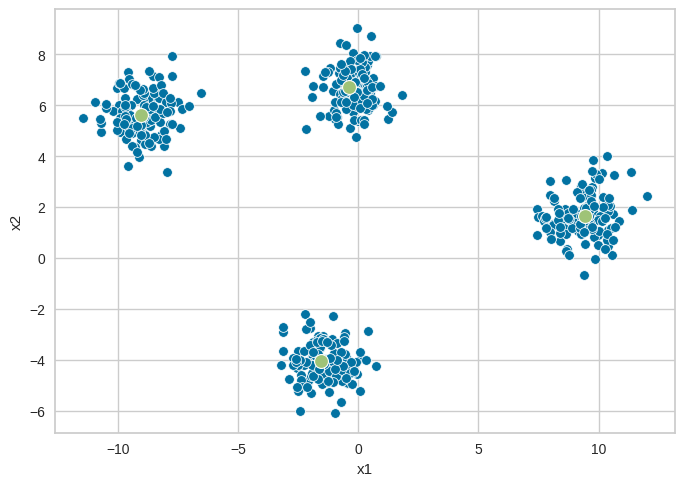

In [6]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', markers='x', s=100)
plt.show()

## Aplicando K-means

In [7]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]
     
    }
)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


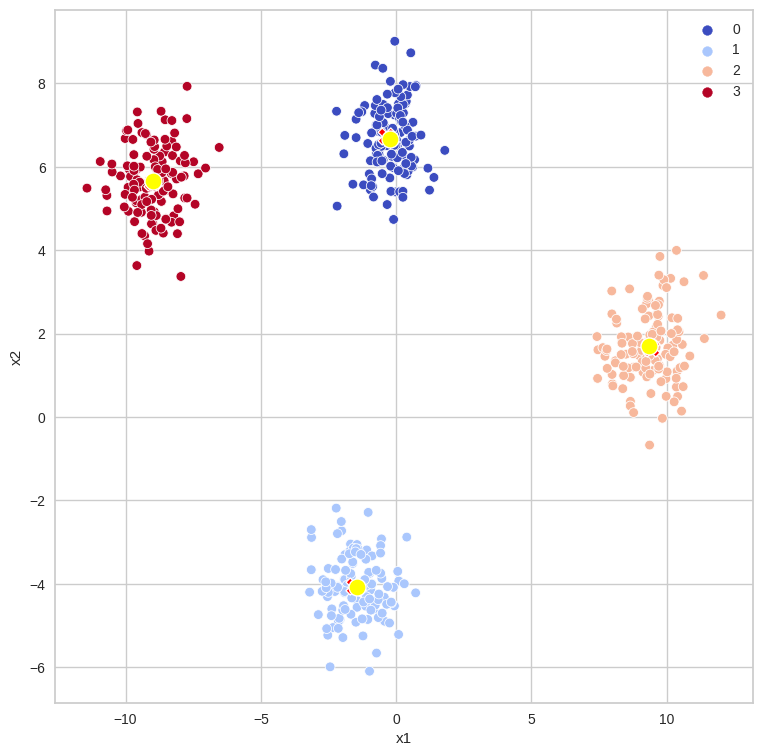

In [8]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
plt.show()

In [9]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )    
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


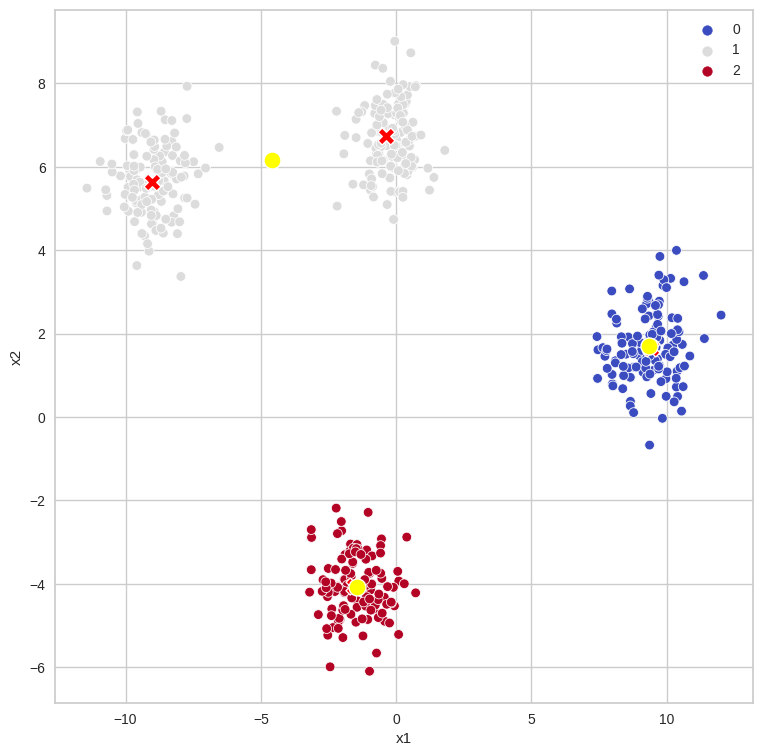

4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


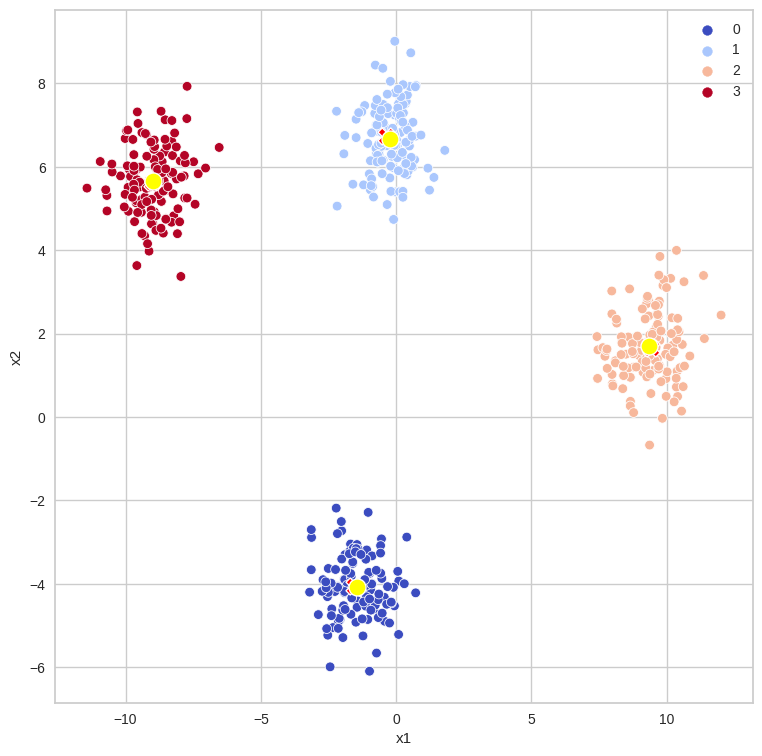

5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


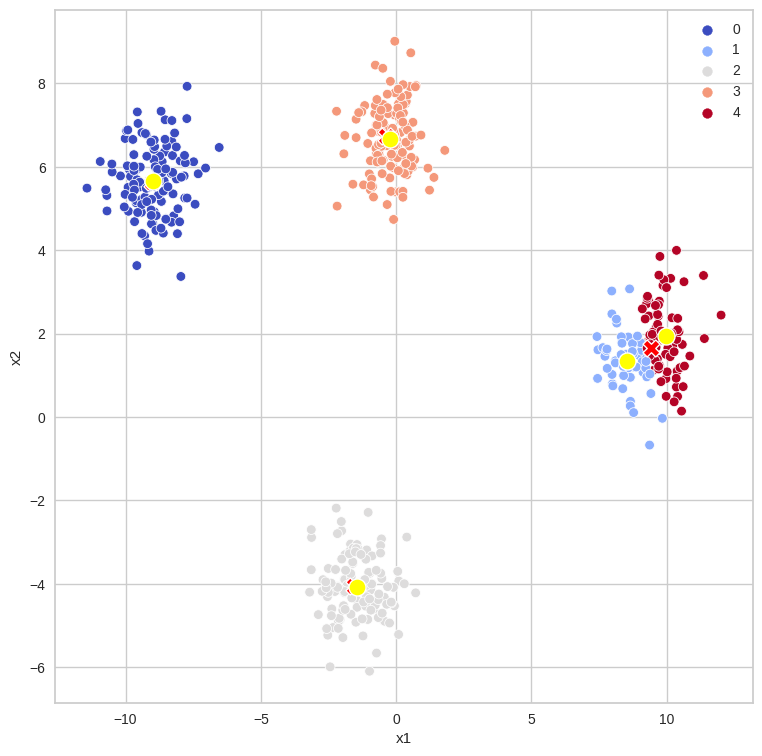

6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


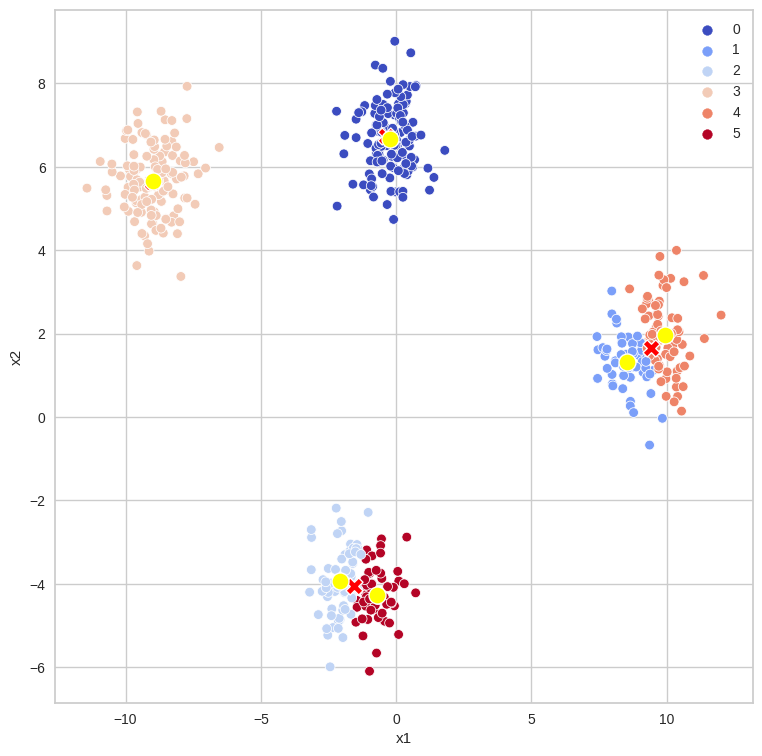

In [10]:
for _ in range(3,7):
    print(_)
    vis_cluster(_)

## Encontrando el valor de K

## Tecnica del Codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

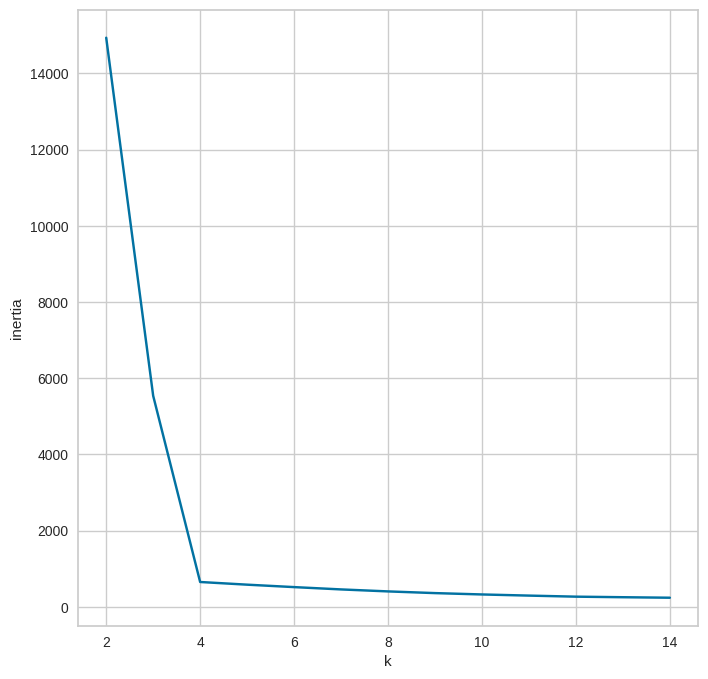

In [12]:
sum_of_squared_distances = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(X)
  sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## Tecnoca Coeficiente de Silueta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

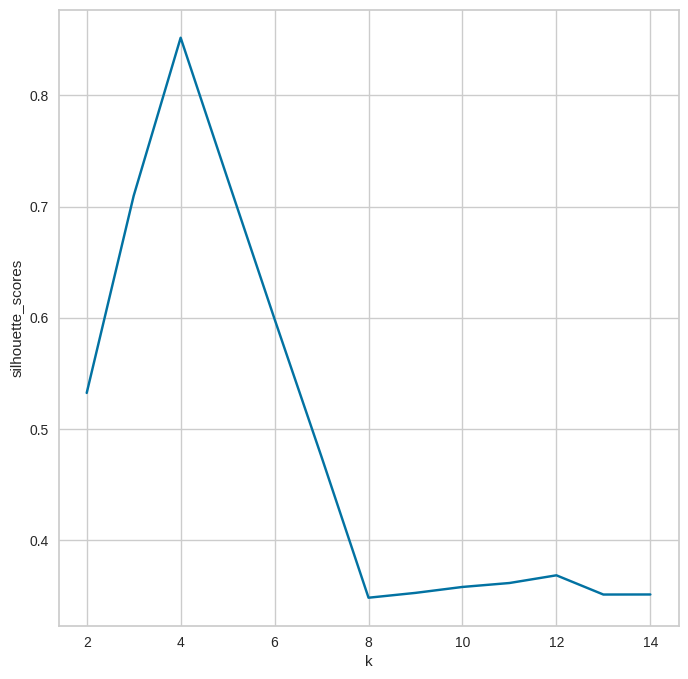

In [14]:
silhouette_scores = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(X)
  y = km.predict(X)
  silhouette_scores.append(silhouette_score(X,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_scores')
plt.show()

## Evaluando los clusters con K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


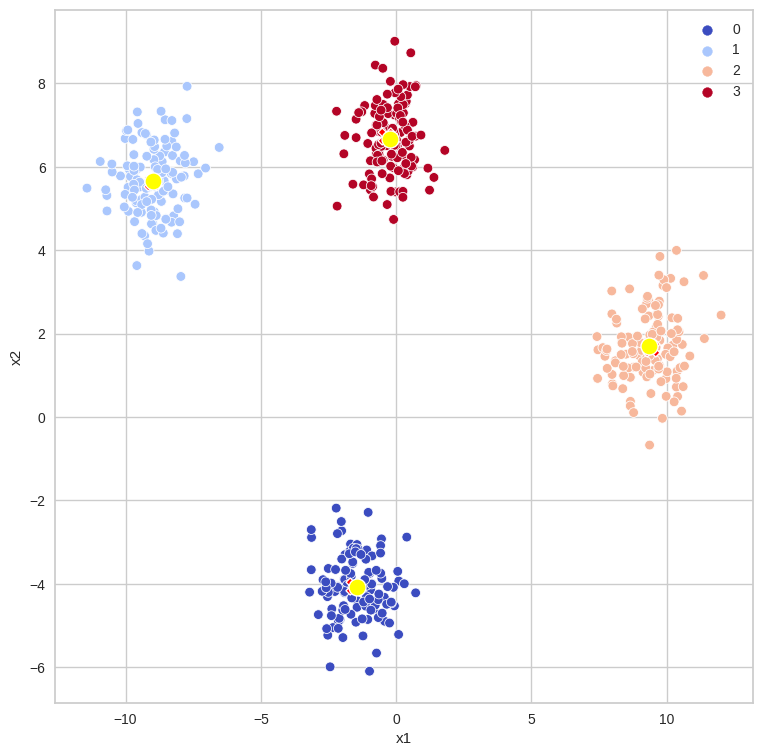

In [15]:
vis_cluster(4)

## Grafica usando el coeficiente de Silueta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

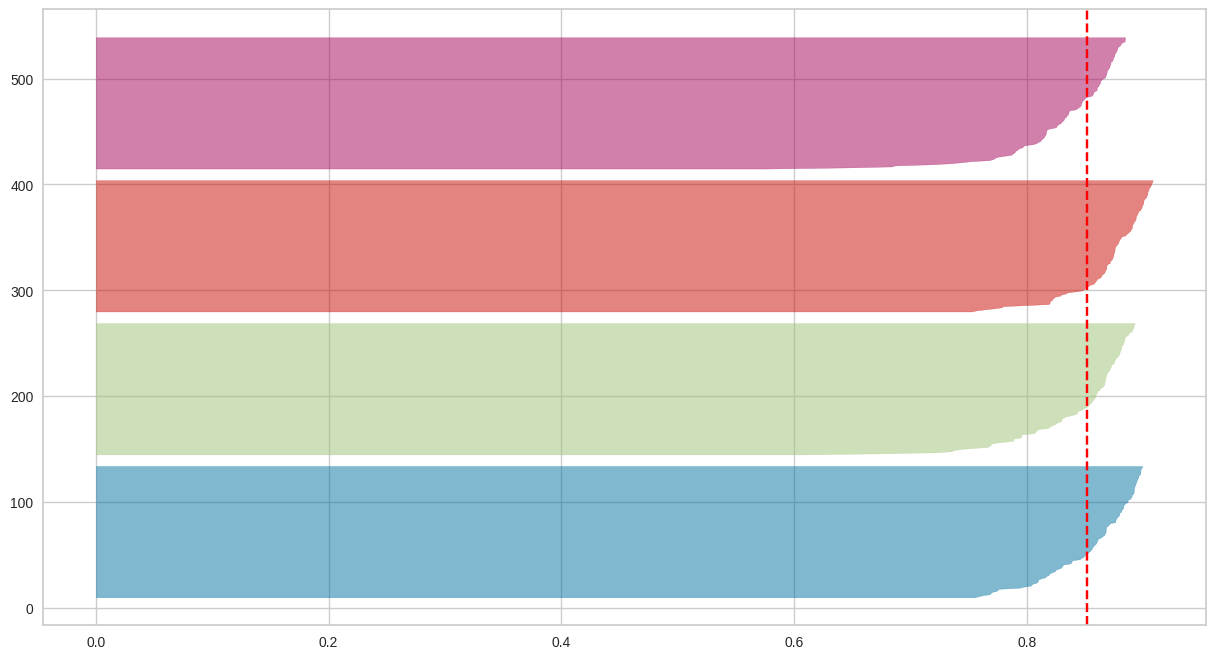

In [16]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)